In [4]:
import pickle
import numpy as np

from dojo.svm import SVR
from dojo.split import cross_validate

# Setup Data
from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions

%matplotlib inline

In [2]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [6]:
epsilon_range = np.linspace(0.1, 2, num=10)
gamma_range = np.linspace(0.1, 1_000, num=10)


In [9]:
best_model = None
best_loss = 10**9

for eps in epsilon_range:
    current_model = SVR(epsilon=eps)
    current_loss = cross_validate(current_model, X, y_log)["test_scores"].mean()
            
    if current_loss < best_loss:
        best_loss = current_loss
        best_model = current_model

ZeroDivisionError: float division by zero

## Visualize Decisions

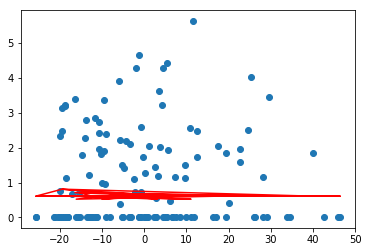

In [8]:
plot_decisions(grid_search.best_estimator_, X, y_log)

## Saving the model

In [9]:
with open("./svm.b", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)